# Mushroom Data Analysis And Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

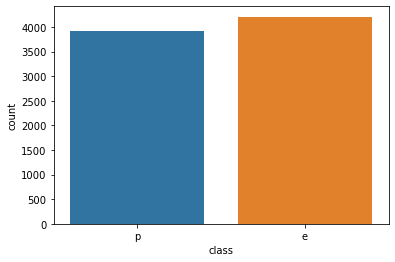

In [8]:
sns.countplot(df['class'])

<Figure size 432x504 with 0 Axes>

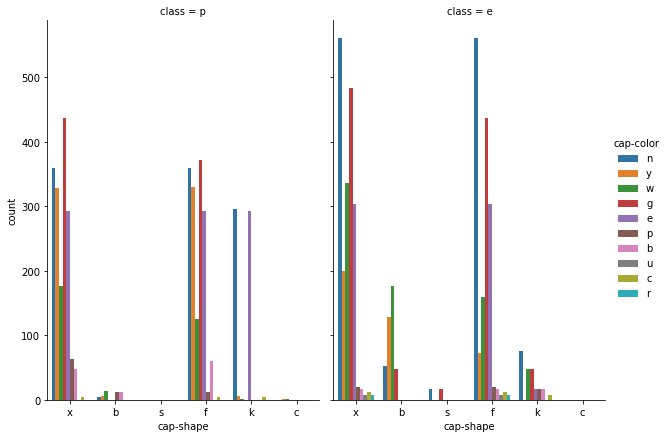

In [15]:
plt.figure(figsize = (6,7))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=6, aspect=.7)

<Figure size 1008x432 with 0 Axes>

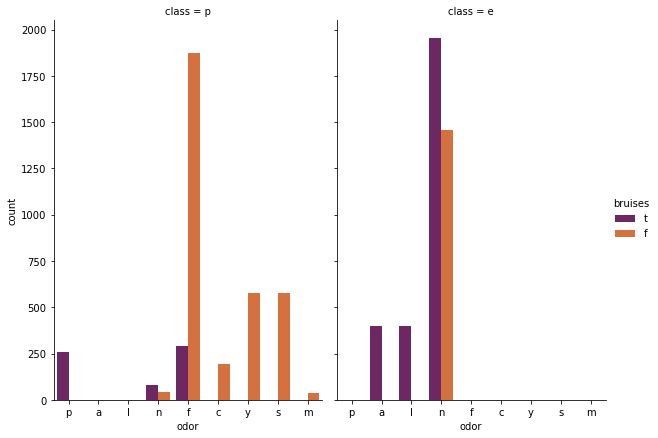

In [16]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=6, aspect=.7 , palette = 'inferno')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
x = df.drop(['class'], axis = 1) 
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 4)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)

In [23]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [25]:
dt.score(x_test,y_test)

0.9809230769230769

In [27]:
yhat = dt.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , yhat)

0.9809230769230769

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [32]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=5)

In [33]:
rf.score(x_train , y_train)

0.9899984613017387

In [34]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.992

In [35]:
accuracy_score(y_test , predictions)

0.992

In [36]:
final_pred_DT = dt.predict(x_test)

In [38]:
final_df = pd.merge(df["class"],pd.Series(np.round(final_pred_DT), name="Class"), 
         left_index=True, right_index=True)

In [39]:
final_df.to_csv("first_submission_DT.csv", index=False)